import library ที่ใช้ในการสร้าง model

In [2]:
import pandas as pd # จัดการ file csv
import seaborn as sns # ทำ data visualization
import statsmodels.api as sm # สร้าง model
import statsmodels.formula.api as smf

เปิด File csv (dataset) 

In [3]:
#df = pd.read_csv("kc_house_data.csv")
df = pd.read_csv("kc_house_10times.csv") # เปิด file csv (dataset)
#X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built']]
#X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'yr_build']]
#X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']]
#y = df['price']
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

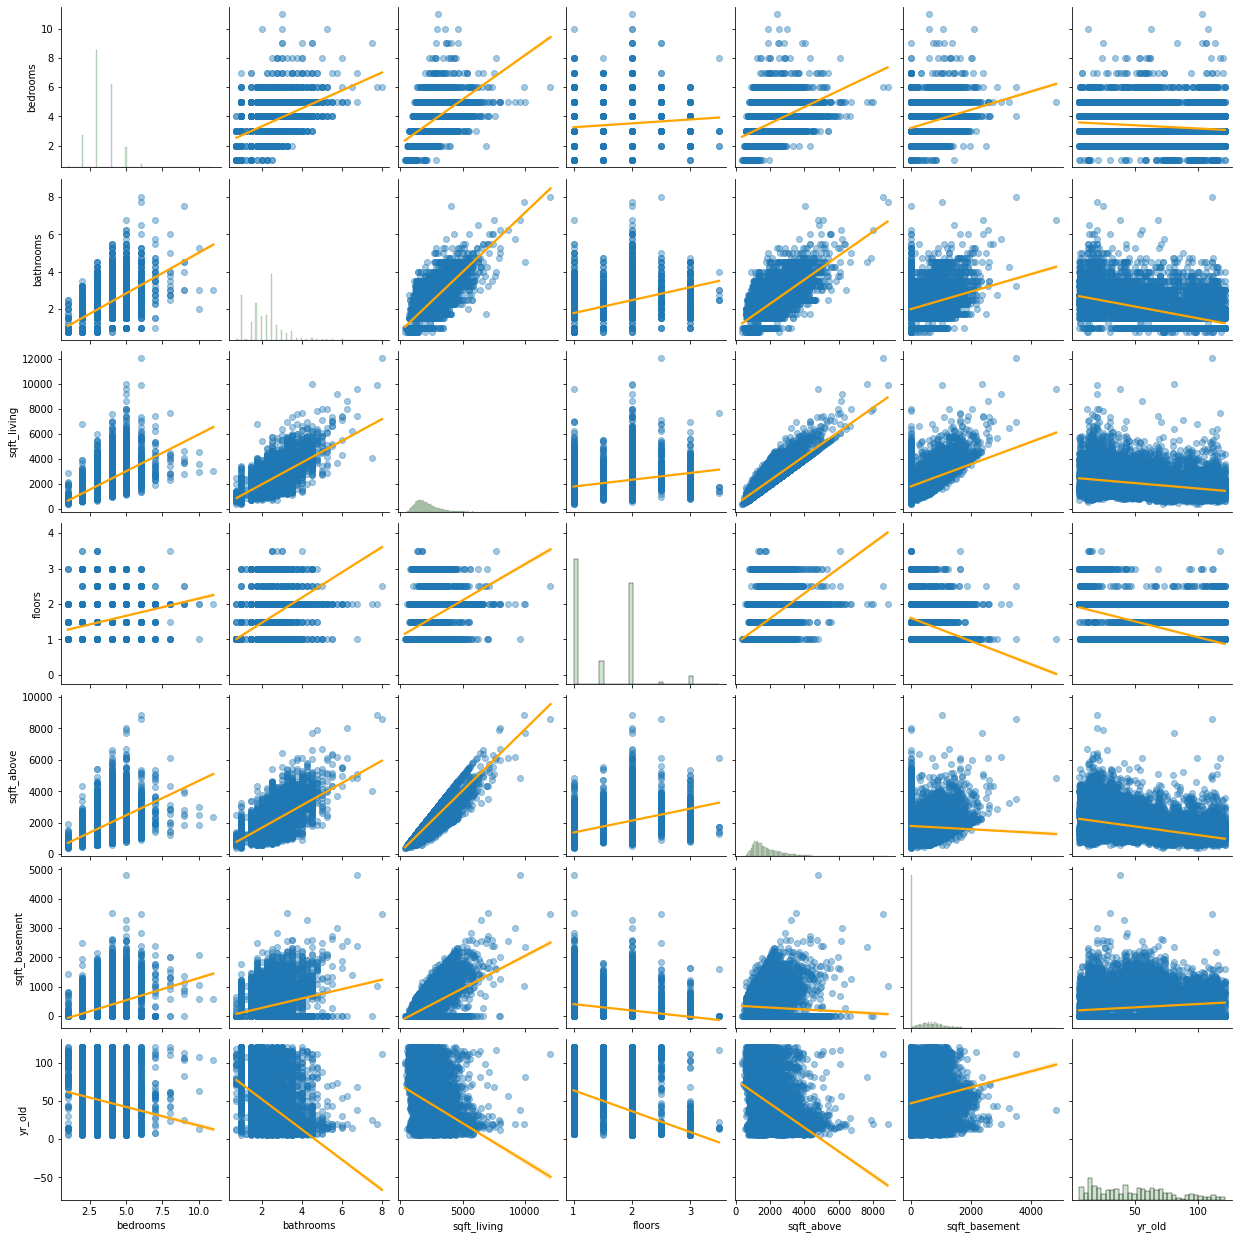

In [4]:
#sns.pairplot(df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built']],
#sns.pairplot(df[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement']],
# ทำ data visualization
sns.pairplot(df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'yr_old']],
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [19]:
# สร้าง model
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living + floors + sqft_above + sqft_basement + yr_old', data=df).fit()


In [20]:
#แสดงผลรายละเอียด model
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     4124.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:35:27   Log-Likelihood:            -2.6540e+05
No. Observations:               19184   AIC:                         5.308e+05
Df Residuals:                   19177   BIC:                         5.309e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.586e+05   1.08e+04    -23.948

In [21]:
# แสดงผลค่า coef
model_a.params 

Intercept       -258646.998249
bedrooms         -82687.870467
bathrooms         69699.476130
sqft_living         213.936651
floors            55738.325568
sqft_above          111.623412
sqft_basement       102.313238
yr_old             3561.951189
dtype: float64

In [23]:
model_a.pvalues

Intercept        6.662763e-125
bedrooms         1.768209e-231
bathrooms         6.055186e-62
sqft_living       0.000000e+00
floors            3.807627e-36
sqft_above        0.000000e+00
sqft_basement    6.464155e-205
yr_old            0.000000e+00
dtype: float64

In [25]:
test = pd.read_csv("thai-data-clean2.csv")
X_test = test[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'yr_old']]
y_test = test['price']

In [26]:
y_prediction = model_a.predict(X_test)
print(y_prediction)

0     9.746473e+05
1     2.236154e+06
2     2.289408e+06
3     1.018043e+06
4     1.806571e+06
5     4.976567e+04
6     4.679744e+05
7     3.908142e+05
8     7.548813e+05
9     5.456773e+05
10   -3.538112e+04
11    4.503969e+05
12    3.439556e+05
13   -1.227596e+04
14    2.843729e+05
15    2.953275e+05
16    4.784942e+04
17   -2.563917e+04
18   -5.827234e+04
19    2.127470e+04
20    3.389706e+05
21    3.090195e+05
22    1.547712e+05
23    2.282598e+05
24    1.660042e+05
25   -4.210958e+04
26    3.066662e+05
27    1.481856e+06
28    4.477149e+05
29    9.747995e+05
30    5.501495e+04
31    4.308578e+05
32    3.134066e+05
33    1.111281e+05
34    3.901659e+05
35    2.377786e+05
36    2.926547e+05
37    1.132675e+05
38    4.937113e+05
39    4.311961e+03
dtype: float64


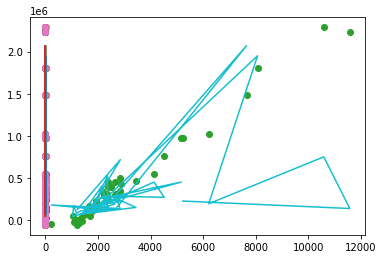

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(X_test, y_prediction, "o", label="Data")
ax.plot(X_test, y_test, label="True")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
#ax.legend(loc="best")

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [37]:
score = r2_score(y_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is ==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is ==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is -0.36635454482527074
mean_sqrd_error is == 238537559054.78485
root_mean_squared error of is == 488403.0702757558
